# Final Project - Weather Forecasting



## Abstract

We will use two different data sets to identify significant factors that contribute to temperature.  We will upload the data, clean it, verify the format, perform an EDA, prepare the data further, and then do two different analyses. The first data set will use linear regression, while the second data set will use a tree regressor.  Our outcome is that predicting a month's temperature (the API data) is easy and reasonable, while predicting the temperature on a longer time frame (the CSV data of 20 years) is much less so.

## Introduction

Weather forecasting is the application of science and technology to predict the atmosphere's conditions for a given location and time. There are a variety of different vital factors beyond just temperature. This includes barometric pressure, current weather conditions, sky condition or cloud cover, atmospheric pressure, pressure tendency, relative humidity, mean wind direction, maximum gust value, dew point, and many more.

The weather of a region has a considerable impact on an ecosystem's water, sunlight, and temperature.  It influences plant life and wildlife and can have dangerous consequences related to storms and natural disasters.

Variations in long-term weather patterns are the key determinant in an ecosystem.  It influences every factor for the population therein.  Weather also controls the distribution of rain on the earth, a necessary prerequisite for survival.

Weather forecasting heavily relies on computer computation with minimal human input.  Moreover, as such, this is an important topic to explore via Python.

### Research Question
We want to figure out factors that influence the temperature.

This could assist in event planning, which is heavily reliant on the weather.  This could also assist in business decisions, such as costs related to heat and air-conditioning.  Also, we could use this to predict weather changes in environmental protection planning.

### Data to be Used

We have two datasets.  Firstly, we have the WorldWeatherOnline.com API data, which we use as a wrapper to import information into Colab directly.  And secondly, we use data via OpenWeatherMap.org from Jan 1, 2003 until April 29, 2021 downloaded via CSV.  Since each dataset covers a different range and has different attributes, we take advantage of the datasets to make two attempts at predicting temperature. 

We will import the data sets (one via CSV the other via API) and then use MongoDB to test the structure of our data, use statistical analysis and graphics to describe and validate our data, use reshaping operations such as converting columns to data format, include data-appropriate data preparation and feature engineering, group and aggregate the data, use graphics, and come to a conclusion about predicting weather based on rigorous analysis and meaningful metrics.

## Research Approach


We took two data sets, one for a month and the other for about 18 years.  We used all the tools we have learned to analyze them.  We started by uploading the data, as explained below, then we did a full EDA, looking at box plots, histograms, correlations, and more.  We used grouping and pivot tables to search for further insights into the data, and verify the integrity of the data as well.  

We used several feature engineering techniques such as RFE, backward selection, and more, and then found the most relevant aspects of our data.  We then proceeded to do a linear regression, showing that our monthly data is quite predictable.

On the longer term data, the EDA was similar, but we use a RandomForestTreeRegressor to test the data.

# EDA

### API Data

We gather our information from **WorldWeatherOnline.com**.  We use the API with a wrapper to gather the information.  Initiallly, we tried to gather our information without the warpper, i.e. directly from the API, however, we ran into several stumbling blocks related to converting said data into a dataframe.  The API adds comments and has a nested form, thus, rather than struggle with it, we employed one of several free wrappers to download the data.  The wrapper was found at this [link](https://medium.com/@David.W1/worldweatherpy-a-python-package-for-weather-data-extraction-b710d8244854).


Our initial, failed attempt at accessing the API directly looked something like the below.

```
r = requests.get("http://api.worldweatheronline.com/premium/v1/weather.ashx?key=fb0ad708586b47e895b23242210205&q=40.70,-73.65&num_of_days=2&date=2021-04-28&cc=no&fx=no&show_comments=no&format=json")
x = r.json()

def jprint(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

jprint(x)
```

In [116]:
!pip install WorldWeatherPy

In [117]:
import numpy as np
import pandas as pd
import requests
import json
import io
from WorldWeatherPy import DetermineListOfAttributes
from WorldWeatherPy import HistoricalLocationWeather
from WorldWeatherPy import RetrieveByAttribute
import pymongo
import sys
import os

Above we import all necessary libraries, while below we set up the API (including the key) to be used to read the data.

In [118]:
frequency=1
start_date = '2021-04-1'
end_date = '2021-04-29'
api_key = 'fb0ad708586b47e895b23242210205'
location_list = '40.70,-73.65'
city = 'west+hempstead,ny'

dataset = HistoricalLocationWeather(api_key, city, start_date, end_date, frequency).retrieve_hist_data()
dataset.shape



Retrieving weather data for west+hempstead,ny


Retrieving data for west+hempstead,ny from: 2021-04-01 to: 2021-04-29
Time elapsed (hh:mm:ss.ms) 0:00:02.137004


(696, 24)

The API has returned the below columns.  Although most of the columns should be straightforward, we still summarize some of the relevant ideas via [this website](https://www.online-sciences.com/earth-and-motion/the-weather-factors-and-the-importance-of-the-weather-prediction/).  We also refer the reader to an excellent article on [National Geographic](https://www.nationalgeographic.org/encyclopedia/weather/) which is far beyond the scope of this project.

<br>
</br>

**The temperature** can be measured by the mercuric thermometer and the digital thermometer, There is a maximum temperature which is the temperature expected during the daytime and there is a minimum temperature which is the temperature expected at night. 

**The atmospheric pressure**: There are regions which have high atmospheric pressure and there are others that have low atmospheric pressure, You can measure the atmospheric pressure by the barometer.  

**The wind**: The wind is the movement of the air from the regions of the high atmospheric pressure to the regions of the low atmospheric pressure. 

The rise of the sea waves is caused by wind speed. The wind direction is determined by the wind vane, and the wind speed is measured by the anemometer.

**The clouds and the rain**: When you look at the sky, you notice that the clouds increase in the coastal regions, and the sky is clear in the desert regions.

The clouds are formed when the water in the seas, the lakes and the oceans evaporate by the effect of the sun rays to form the water vapour. which rises in the sky, then it cooled and condensed to form the clouds. 

The rain is formed when the clouds move by the effect of the winds, and the volume of the water drops in the clouds increases, then the air can not carry them, So the rains fall.

In [119]:
dataset.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,city
date_time,,,,,,,,,,,,,,,,,,,,,,,,
2021-04-01 00:00:00,10,5,0.0,6.4,2,63,No moonrise,09:09 AM,06:38 AM,07:20 PM,11,8,10,8,19,100,98,1.4,1010,8,5,174,11,"west+hempstead,ny"
2021-04-01 01:00:00,10,5,0.0,6.4,2,63,No moonrise,09:09 AM,06:38 AM,07:20 PM,11,9,10,9,18,100,98,0.7,1008,9,3,189,10,"west+hempstead,ny"
2021-04-01 02:00:00,10,5,0.0,6.4,2,63,No moonrise,09:09 AM,06:38 AM,07:20 PM,11,9,11,9,17,100,98,0.0,1007,10,2,203,10,"west+hempstead,ny"
2021-04-01 03:00:00,10,5,0.0,6.4,2,63,No moonrise,09:09 AM,06:38 AM,07:20 PM,11,10,11,10,17,100,97,0.0,1006,11,1,218,10,"west+hempstead,ny"
2021-04-01 04:00:00,10,5,0.0,6.4,2,63,No moonrise,09:09 AM,06:38 AM,07:20 PM,10,9,11,9,19,100,95,0.0,1005,11,2,253,12,"west+hempstead,ny"


Here we drop several columns from our dataset.  The columns moonrise, moonset, sunrise, and sunset are datapoints that are not relevant to our specific quetion about predicted temperature, since we are working on hourly metrics, and the scale of these is daily.  It is also irrelevant durinig certain hours.  As such, we recognize that while these metrics are another route of inquiry, we will hold off on them for another time.

Also, the precipMM and totalSnow_cm are infrequent enough, that we will leave them for another line of inquiry as well.  The city column is dropped because it is the same everywhere, and through our expert knowledge gained through such sites as [this](http://euanmearns.com/do-clouds-control-temperature-or-does-temperature-control-clouds/), we conclude with the same outcome the author of the linked article has: *temperatures control clouds, and not the other way round.* And, as such drop cloud cover as well.

We also exclude FeelLikeC, due to it being almost the same as tempC, as can be shown from any correlation analysis or expert knowledge.



In [120]:
#drop all the data that we don't need
dataset.drop(['moon_illumination','moonrise','moonset','sunrise',	'sunset','city','precipMM','cloudcover','totalSnow_cm','FeelsLikeC'],axis =1,inplace=True)

#check for nulls or missing data
dataset.isnull().sum()

maxtempC         0
mintempC         0
sunHour          0
uvIndex          0
DewPointC        0
HeatIndexC       0
WindChillC       0
WindGustKmph     0
humidity         0
pressure         0
tempC            0
visibility       0
winddirDegree    0
windspeedKmph    0
dtype: int64

Here we check for any other type of missing values outside of just using the isnull() function.

In [121]:
#check for other possible missing values

def missingVals(df,val):
  print('Missing Vals: ' + val +'\n')
  for attr in df: 
    c = df[df[attr] == val]
    if not c.empty:
        print(attr, ': ', len(c))

missing_vals = ['?','-','None', 'NaN','0']
for k in missing_vals:
  missingVals(dataset,k)

Missing Vals: ?

Missing Vals: -

Missing Vals: None

Missing Vals: NaN

Missing Vals: 0

DewPointC :  12
WindChillC :  10


We see here that no missing values were found for other symbols.  And where 0s were found, it is sensible that they should be there.  

Since we will be doing analysis on the data, we need to check what data type each value is.  We find below that everything is an object, which means we will need to convert it to a float.

In [122]:
#check the datatype and convert if necessary
print(dataset.dtypes)
dataset = dataset.astype(float)

maxtempC         object
mintempC         object
sunHour          object
uvIndex          object
DewPointC        object
HeatIndexC       object
WindChillC       object
WindGustKmph     object
humidity         object
pressure         object
tempC            object
visibility       object
winddirDegree    object
windspeedKmph    object
dtype: object


In [123]:
dataset.describe()

,maxtempC,mintempC,sunHour,uvIndex,DewPointC,HeatIndexC,WindChillC,WindGustKmph,humidity,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,13.793103,7.620690,9.768966,3.448276,3.277299,10.850575,8.797414,22.462644,62.376437,1013.176724,10.727011,9.396552,226.645115,16.714080
std,3.980204,3.190783,2.494417,0.968673,6.050802,4.198057,5.441968,9.492369,18.206465,5.795466,4.108271,1.494619,86.259816,7.320426
min,5.000000,1.000000,6.400000,2.000000,-13.000000,1.000000,-5.000000,2.000000,22.000000,1001.000000,1.000000,1.000000,17.000000,2.000000
25%,10.000000,6.000000,6.600000,3.000000,0.000000,8.000000,5.000000,14.750000,50.000000,1009.000000,8.000000,10.000000,168.750000,11.000000
50%,14.000000,8.000000,10.400000,4.000000,4.000000,11.000000,9.000000,22.000000,62.000000,1014.000000,11.000000,10.000000,247.000000,15.000000
75%,16.000000,10.000000,11.600000,4.000000,7.000000,13.000000,12.000000,30.000000,78.000000,1017.000000,13.000000,10.000000,303.000000,22.000000
max,25.000000,14.000000,13.900000,6.000000,15.000000,26.000000,25.000000,44.000000,98.000000,1026.000000,25.000000,10.000000,349.000000,36.000000


Here we see all the major statistics for our numerical data.  It is interesting to note how low the standard deviation in many of the categories.  

Below we see the histrogram and boxplot for all of our data.

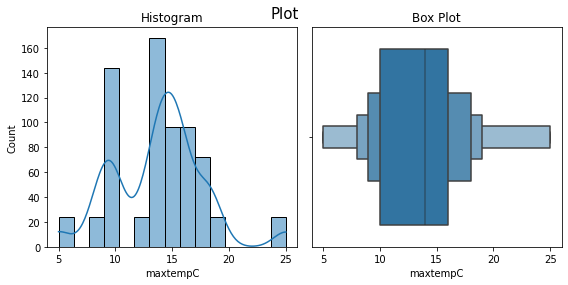

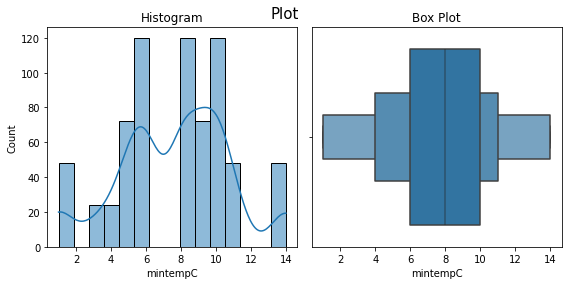

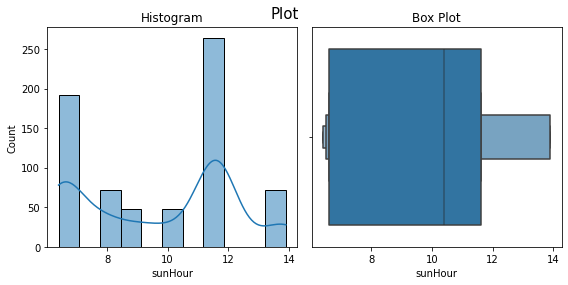

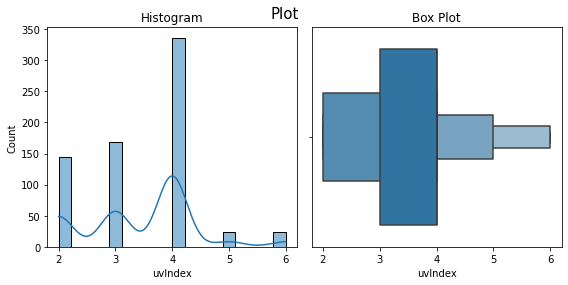

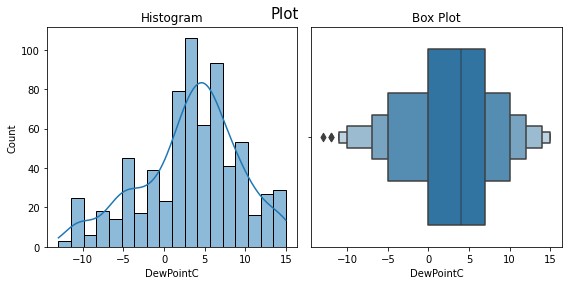

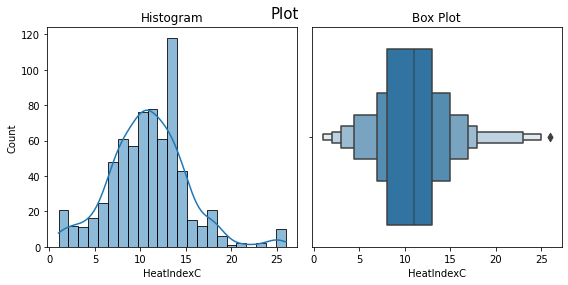

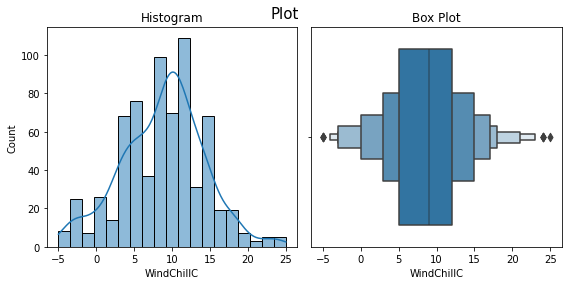

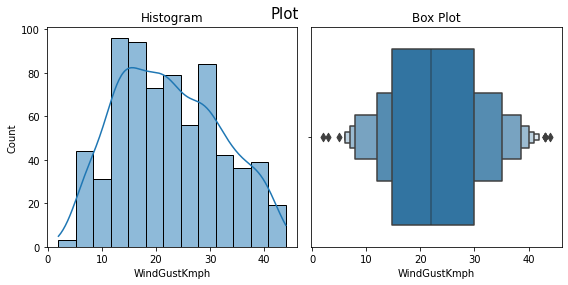

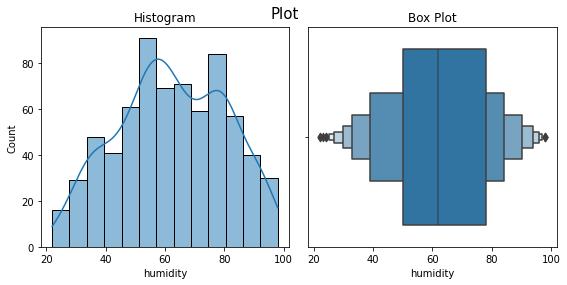

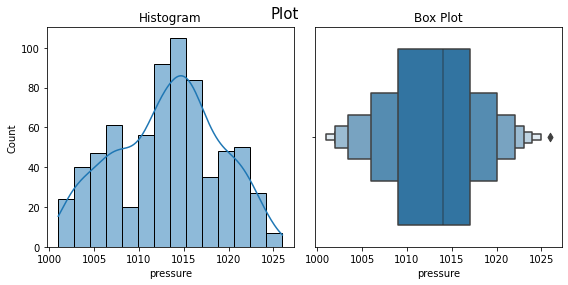

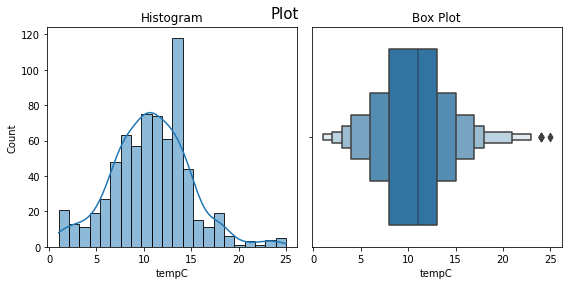

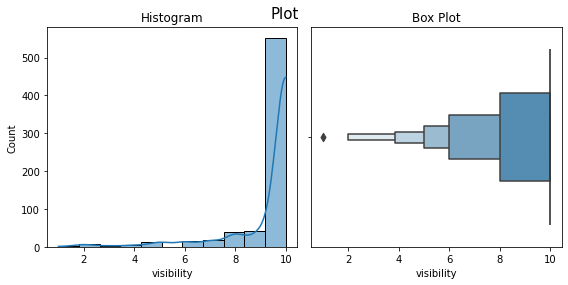

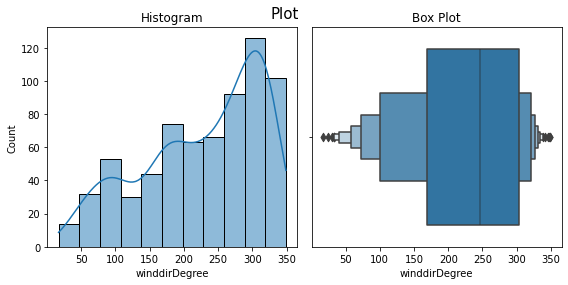

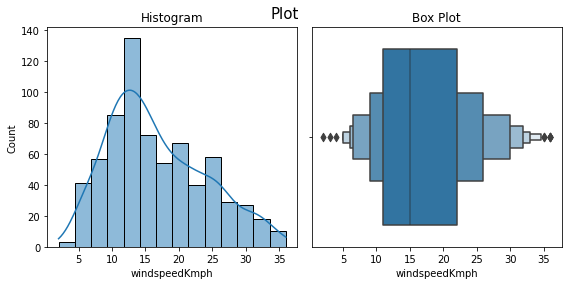

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

the_plots = ['maxtempC','mintempC','sunHour','uvIndex','DewPointC','HeatIndexC','WindChillC','WindGustKmph',	'humidity',	'pressure',	'tempC'	,'visibility',	'winddirDegree',	'windspeedKmph']

for k in the_plots:
  plt.figure(figsize = (8,4))
  plt.suptitle('Plot', size = 15)
  plt.subplot(1,2,1)
  plt.title('Histogram')
  sns.histplot(x = dataset[k], kde = True)
  plt.subplot(1,2,2)
  plt.title('Box Plot')
  sns.boxenplot(x = dataset[k])
  plt.tight_layout()


We note that sunhour, uvindex, and visibility have boxplots that differ widely form the rest, with few categories (outside of the above noted ones) having a large number of outliers or a mult-model distribution.  

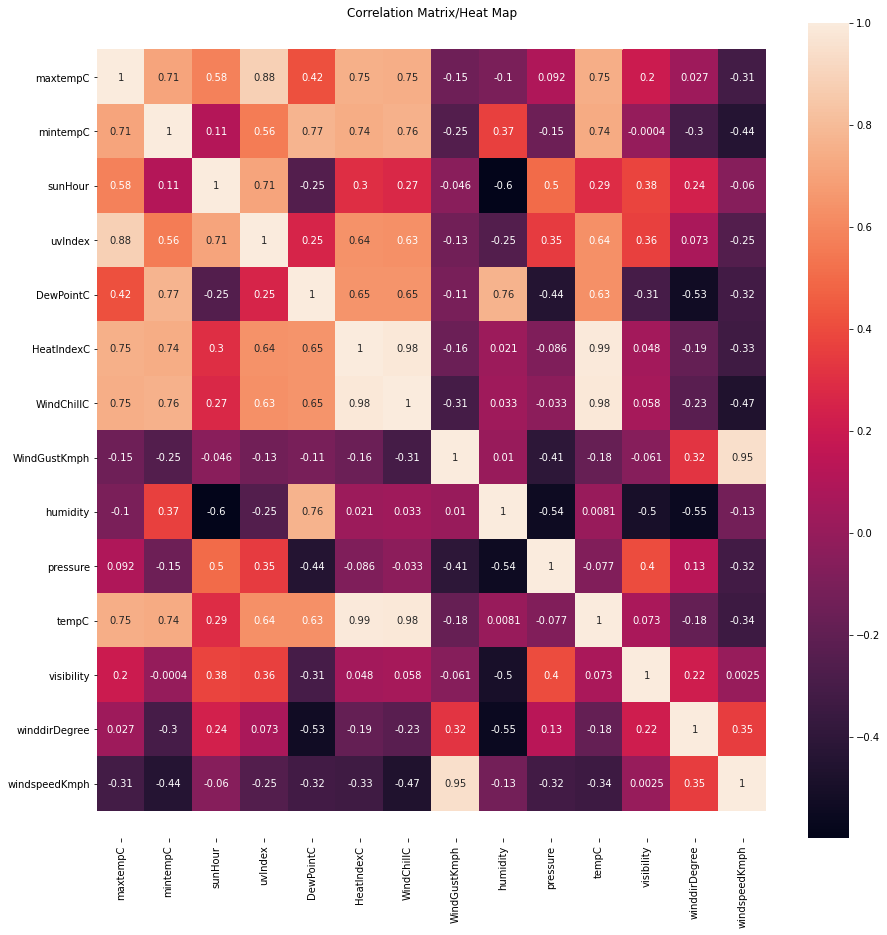

In [125]:
#get correlation matrix between the numeric variables and plot it using seaborn

#set figure size
plt.figure(figsize=(15, 15)) 

#get correlation matrix
corrMatrix = dataset.corr() 

#graph correlation matrix
sns.heatmap(corrMatrix, annot=True) 
plt.title('Correlation Matrix/Heat Map') 

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

Here we have the correlation matrix.  There are many points that are highly correlated, but none too suprising. For instance, windspeed and windgust should rightly be correlated, as well as max and min temp with feels_like and heatIndex.  While there may be some important relationships here, we will keep this as a reference while going further, noting that it may be a multi-collinearity issue with certain factors such as temp and feelsLike, maxtemp and mintemp, as well as windspeed and windgust.

Below we test some alternative representations of our data using grouping.

In [126]:
#here we look at WinChill and humidity against the temperature.
#this is just exploratory, to see if anything interesting comes out of it
#we use the mean in order to simplify our result
group_it = dataset['tempC'].groupby([dataset['WindChillC'],dataset['humidity']]).mean()
group_it

WindChillC  humidity
-5.0        45.0         1.0
            47.0         1.0
            49.0         1.0
            51.0         1.0
-4.0        41.0         1.0
                        ... 
 23.0       57.0        23.0
 24.0       50.0        24.0
            51.0        24.0
            52.0        24.0
 25.0       49.0        25.0
Name: tempC, Length: 475, dtype: float64

The above doesn't indicate anything further than a range of humidities associated with different windchills - and an obviously associated temperature to windchill.

Below we break our studied feature into quartiles, do better understand it.  Although this could give us a good idea of the range, we don't see anything new here.  If we were missing values, this would be an excellent tool for imputation - i.e. using quartile modes or medians to imput given other charcteristics as well. 

In [127]:
quartiles = pd.cut(dataset.tempC, 4)
quartiles

date_time
2021-04-01 00:00:00     (7.0, 13.0]
2021-04-01 01:00:00     (7.0, 13.0]
2021-04-01 02:00:00     (7.0, 13.0]
2021-04-01 03:00:00     (7.0, 13.0]
2021-04-01 04:00:00     (7.0, 13.0]
                           ...     
2021-04-29 19:00:00    (13.0, 19.0]
2021-04-29 20:00:00    (13.0, 19.0]
2021-04-29 21:00:00    (13.0, 19.0]
2021-04-29 22:00:00     (7.0, 13.0]
2021-04-29 23:00:00     (7.0, 13.0]
Name: tempC, Length: 696, dtype: category
Categories (4, interval[float64]): [(0.976, 7.0] < (7.0, 13.0] < (13.0, 19.0] < (19.0, 25.0]]

# Feature Engineering and Data Preparation

Below we use different feature engineering techniques to further identify important features of our EDA.  Above we noted relevant ideas, and here we test them out, alongside addressing potential data integrity issues.

We investigate several different measures (K-Best, RFE, Backward Selection, and Lasso).  We find the three greatest features for each method, then we compare the results in the next step.

### K-Best with an F-Regression

An F-test is any statistical test in which the test statistic has an F-distribution under the null hypothesis. It is most often used when comparing statistical models that have been fitted to a data set, in order to identify the model that best fits the population from which the data were sampled. (Wiki)

The F-distribution is formed by the ratio of two independent chi-square variables divided by their respective degrees of freedom. Since F is formed by chi-square, many of the chi-square properties carry over to the F distribution.

* The F-values are all non-negative
* The distribution is non-symmetric
* The mean is approximately 1
* There are two independent degrees of freedom, one for the numerator, and one for the denominator.
* There are many different F distributions, one for each pair of degrees of freedom.

The F-test is designed to test if two population variances are equal. It does this by comparing the ratio of two variances. So, if the variances are equal, the ratio of the variances will be 1. ([link](https://people.richland.edu/james/lecture/m170/ch13-f.html))

In general, one would expect that p-values are used to find features that are significantly better, but it seems the scikit-learn implementation is effectively the same as just choosing the best k cases in a regression analysis of each variable against our target.

In [128]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

target = dataset['tempC']
features = dataset.drop('tempC',axis=1).copy()
feature_names = ['maxtempC'	,'mintempC',	'sunHour',	'uvIndex',	'DewPointC'	,'FeelsLikeC',	'HeatIndexC',	'WindChillC',	'WindGustKmph',	'humidity'	,'pressure',	'visibility',	'winddirDegree',	'windspeedKmph']

selection_kBest = SelectKBest(f_regression,k = 3).fit(features,target)

#find which columns were chosen
features_kbest = selection_kBest.get_support()
print("Overall features: ", dataset.columns,'\n')
print("Chosen features: ", features.columns[features_kbest],'\n')

selection_kBest.scores_

Overall features:  Index(['maxtempC', 'mintempC', 'sunHour', 'uvIndex', 'DewPointC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'humidity', 'pressure', 'tempC',
       'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object') 

Chosen features:  Index(['maxtempC', 'HeatIndexC', 'WindChillC'], dtype='object') 



array([8.82941826e+02, 8.21678830e+02, 6.39317964e+01, 4.74218530e+02,
       4.61123002e+02, 5.02744334e+04, 2.07367127e+04, 2.20021580e+01,
       4.49870275e-02, 4.15408770e+00, 3.71374092e+00, 2.44791044e+01,
       8.93563156e+01])

In [129]:
#see which feature is associated with which score
scores = pd.DataFrame({'Feature Name' : features.columns, 'Score' : selection_kBest.scores_}).sort_values(by='Score',ascending=False)
print(scores)

     Feature Name         Score
5      HeatIndexC  50274.433407
6      WindChillC  20736.712653
0        maxtempC    882.941826
1        mintempC    821.678830
3         uvIndex    474.218530
4       DewPointC    461.123002
12  windspeedKmph     89.356316
2         sunHour     63.931796
11  winddirDegree     24.479104
7    WindGustKmph     22.002158
9        pressure      4.154088
10     visibility      3.713741
8        humidity      0.044987


In [130]:
univariate_analysis_df = pd.DataFrame({'Chosen' : features.columns[features_kbest]})
print(univariate_analysis_df)

       Chosen
0    maxtempC
1  HeatIndexC
2  WindChillC


Using the K-Best with an F-regressor, we find that the 3 most influential factors here are maxtempC, HeatIndexC, and WindChillC.  The third of these is somewhat surprising, given all the other features which would seemingly have a greater relationship.

### RFE - Recursive Feature Elimination

RFE is a feature selection algorithm.  It is a wrapper-type feature selection algorithm. This means that a different machine learning algorithm is given and used in the core of the method.  It is wrapped by RFE, and used to help select features. This is in contrast to filter-based feature selections that score each feature and select those features with the largest (or smallest) score.

Technically, RFE is a wrapper-style feature selection algorithm that also uses filter-based feature selection internally.

RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains.

This is achieved by fitting the given machine learning algorithm used in the core of the model, ranking features by importance, discarding the least important features, and re-fitting the model. This process is repeated until a specified number of features remains.

When the full model is created, a measure of variable importance is computed that ranks the predictors from most important to least.  At each stage of the search, the least important predictors are iteratively eliminated prior to rebuilding the model. ([link](https://machinelearningmastery.com/rfe-feature-selection-in-python/#:~:text=Recursive%20Feature%20Elimination%2C%20or%20RFE%20for%20short%2C%20is%20a%20feature,columns%2C%20like%20an%20excel%20spreadsheet.&text=Feature%20selection%20refers%20to%20techniques,(columns)%20for%20a%20dataset))

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

#to wrap on RFE
lr = LinearRegression()

#prune one feature on each iteration
#select 3
rfe = RFE(estimator = lr, n_features_to_select = 3, step = 1)

rfe.fit(features,target)

rfe_features = features.columns[rfe.support_]
print(rfe_features)

Index(['uvIndex', 'HeatIndexC', 'WindChillC'], dtype='object')


In [132]:
rfe_output = pd.DataFrame({'Features' : features.columns, "Rank" : rfe.ranking_}).sort_values(by="Rank")

#output the entire list
print(rfe_output)

         Features  Rank
3         uvIndex     1
5      HeatIndexC     1
6      WindChillC     1
10     visibility     2
12  windspeedKmph     3
0        maxtempC     4
7    WindGustKmph     5
4       DewPointC     6
8        humidity     7
2         sunHour     8
9        pressure     9
1        mintempC    10
11  winddirDegree    11


###Forward and Backward Selection

Backward elimination process - [link](https://towardsdatascience.com/backward-elimination-for-feature-selection-in-machine-learning-c6a3a8f8cef4)

Forward elimination process - [link](https://towardsdatascience.com/using-forward-selection-to-filter-out-unnecessary-features-in-a-machine-learning-dataset-e36c62431781)

Forward Selection: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

Backward Elimination: In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features. [link](https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/#:~:text=Forward%20Selection%3A%20Forward%20selection%20is,the%20performance%20of%20the%20model.)

In [133]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

target = dataset['tempC']
features = dataset.drop('tempC',axis=1).copy()
feature_names = ['maxtempC'	,'mintempC',	'sunHour',	'uvIndex',	'DewPointC'	,'FeelsLikeC',	'HeatIndexC',	'WindChillC',	'WindGustKmph',	'humidity'	,'pressure',	'visibility',	'winddirDegree',	'windspeedKmph']

#backward selection
feature_selector = SequentialFeatureSelector(LinearRegression(),k_features =3, forward=False,scoring='neg_mean_squared_error',cv=4)

#this step is strange, but we are using features.values and target.values to convert the data to numpy in order to run
feature_filtered = feature_selector.fit(features.values, target.values)

#list which features are included
backward_features = list(feature_filtered.k_feature_names_)
print(backward_features, '\n')

original_features = pd.DataFrame({'Features' : features.columns})
print(original_features)

['5', '6', '12'] 

         Features
0        maxtempC
1        mintempC
2         sunHour
3         uvIndex
4       DewPointC
5      HeatIndexC
6      WindChillC
7    WindGustKmph
8        humidity
9        pressure
10     visibility
11  winddirDegree
12  windspeedKmph


In [134]:
#get a list of the actual names 
#convert it to a dataFrame

backward_df = []

for k in backward_features:
  backward_df.append(original_features['Features'].loc[int(k)])

backward_df = pd.DataFrame({'Backward': backward_df})
print(backward_df)

        Backward
0     HeatIndexC
1     WindChillC
2  windspeedKmph


###Lasso Regression

The LASSO (Least Absolute Shrinkage and Selection Operator) is a regression method that involves penalizing the absolute size of the regression coefficients.

By penalizing (or equivalently constraining the sum of the absolute values of the estimates) you end up in a situation where some of the parameter estimates may be exactly zero. The larger the penalty applied, the further estimates are shrunk towards zero.

This is convenient when we want some automatic feature/variable selection, or when dealing with highly correlated predictors

In [135]:
from sklearn.linear_model import Lasso

#1.0 is the strongest regularization
#the most important features are those far away from zero
lasso = Lasso(alpha=1.0).fit(features,target)

lasso_info = pd.DataFrame({'Features' :features.columns, 'LassoCoef':lasso.coef_}).sort_values(by='LassoCoef',ascending = False)

print(lasso_info)

         Features  LassoCoef
6      WindChillC   0.714468
7    WindGustKmph   0.040176
5      HeatIndexC   0.021251
0        maxtempC   0.000000
1        mintempC   0.000000
2         sunHour   0.000000
3         uvIndex   0.000000
4       DewPointC   0.000000
9        pressure  -0.000000
10     visibility   0.000000
11  winddirDegree   0.000000
12  windspeedKmph   0.000000
8        humidity  -0.002572


In [136]:
#use the absolute values
lasso_info['LassoCoef'] = abs(lasso_info['LassoCoef'])
lasso_df = lasso_info.sort_values(by='LassoCoef',ascending=False)
print(lasso_df)

         Features  LassoCoef
6      WindChillC   0.714468
7    WindGustKmph   0.040176
5      HeatIndexC   0.021251
8        humidity   0.002572
0        maxtempC   0.000000
1        mintempC   0.000000
2         sunHour   0.000000
3         uvIndex   0.000000
4       DewPointC   0.000000
9        pressure   0.000000
10     visibility   0.000000
11  winddirDegree   0.000000
12  windspeedKmph   0.000000


In [137]:
#get all the different tables of chosen options

univariate_analysis_df = pd.DataFrame({'Univariate' : features.columns[features_kbest]})
rfe_analysis_df = pd.DataFrame({'RFE' : rfe_output['Features'].head(3).values})
backward_analysis_df = backward_df
lasso_analysis_df = pd.DataFrame({'Lasso' : lasso_df['Features'].head(3).values})

selected = [univariate_analysis_df,rfe_analysis_df,backward_analysis_df, lasso_analysis_df]
final_df = pd.concat(selected, axis=1)

print(final_df)

   Univariate         RFE       Backward         Lasso
0    maxtempC     uvIndex     HeatIndexC    WindChillC
1  HeatIndexC  HeatIndexC     WindChillC  WindGustKmph
2  WindChillC  WindChillC  windspeedKmph    HeatIndexC


## Prepped Data Review

Here we review where we are up to.  Our EDA indicated several interesting relationships, explained the distributions and outliers, and tabulated the cleanliness of our data. 

In the feature engineering stage we came out with three important factors that seem to influence our data set.  We will test these in our regression.

# Investigative Analysis & Results


In [138]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

def score(name,X,y):
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)
  le = LinearRegression(normalize=True).fit(X_train,y_train)
  print(name)
  print('Training score:\t ', le.score(X_train,y_train))

  y_pred = le.predict(X_test)
  print('r2_score:\t ', r2_score(y_test,y_pred))

In [139]:
#print out all the values
#reminder: features is still all the values outside of Price and target is Price

for k in final_df.columns:
  score(k,features[final_df[k].values],target)
  print()

Univariate
Training score:	  0.9866424834344357
r2_score:	  0.9953847701130787

RFE
Training score:	  0.9896593395629009
r2_score:	  0.984946842592513

Backward
Training score:	  0.9911616605134845
r2_score:	  0.9890442666850983

Lasso
Training score:	  0.9895828412249509
r2_score:	  0.9906423812078905



Given the above, we find that there are a number of possibilities, all equally good, to predict temperature.  

```
   Univariate         RFE       Backward         Lasso
0    maxtempC     uvIndex     HeatIndexC    WindChillC
1  HeatIndexC  HeatIndexC     WindChillC  WindGustKmph
2  WindChillC  WindChillC  windspeedKmph    HeatIndexC
```
While maxtemp and HeatIndex are clear, it is most interesting to note that each potential model still had a 98% predictability with some form of windchill (or windspeed) over other potential metrics such as mintemp, etc.

Thus, we see that temperature is easily predictable.

Before concluding our remarks, we do a similar investigation into another data set that we are using.  However, below we attempt a RandomTreeRegressor and are not met with the same results.

**Much of the analysis is the same as above, thus, unless there is a new point or new angle, it is not repeated.**

### CSV Data

The data for the CSV download was taken from **OpenWeatherMap.org**.  It is data from Jan 1, 2003 until April 29, 2021. Since we have different times and dates for our two datasets, we will be working on them separately, rather than putting them together. 

Although above we looked for temperature, here we look for feels_like. The correlation between the two is .95, so we assume it is comparable to the previous case.

In [140]:
df_csv = pd.read_csv('https://raw.githubusercontent.com/MatthewFried/MAT5001/main/Final_Project/weather_data.csv')
print(df_csv.shape)
df_csv.head()

(170243, 16)


,dt,dt_iso,timezone,city_name,lat,lon,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,weather_main,weather_description
0,1041379200,2003-01-01 00:00:00 +0000 UTC,-18000,West Hempstead,40.704824,-73.650129,6.62,3.34,3.9,10.6,1014,100,3.56,205,Mist,mist
1,1041379200,2003-01-01 00:00:00 +0000 UTC,-18000,West Hempstead,40.704824,-73.650129,6.62,3.34,3.9,10.6,1014,100,3.56,205,Fog,fog
2,1041382800,2003-01-01 01:00:00 +0000 UTC,-18000,West Hempstead,40.704824,-73.650129,6.53,4.26,4.0,9.4,1015,100,2.10,260,Mist,mist
3,1041382800,2003-01-01 01:00:00 +0000 UTC,-18000,West Hempstead,40.704824,-73.650129,6.53,4.26,4.0,9.4,1015,100,2.10,260,Fog,fog
4,1041386400,2003-01-01 02:00:00 +0000 UTC,-18000,West Hempstead,40.704824,-73.650129,6.33,2.74,2.0,9.4,1014,100,3.92,232,Mist,mist


### MongoDB

Although we have no reason to use a DBMS due to directly downloading the data via CSV and uploading it to github, we still show how connecting to MongoDB would work.

```
#use pymongo to connect to mongoDB
 import pymongo

 #connec to the client
 client = pymongo.MongoClient() 

#list the existing database
client.list_database_names()

#choose the database we want
local_db = client.df_csv

#look at the tables in our database (called collections)
local_db.list_collection_names()

#select the collection within the database
test = loca_db.test

#convert entire collection to Pandas dataframe
test = pd.DataFrame(list(test.find()))
```

### Convert to Date Format

The below code extracts from the dt_iso column just the date (which is under the title: 'using a reshaping operation', in the project guidelines).  While it works, it took over twenty minutes to run, so we leave it here as a reference, rather than include it directly.  It will not affect any stated goals, as such we don't hesitate to smooth out our process.

```
import re
from datetime import datetime

for index, row in df_csv.iterrows():
  text = df_csv.loc[index,'dt_iso']
  df_csv.loc[index, "dt_iso"] = str(datetime.strptime((re.search(r'\d{4}-\d{2}-\d{2}', text)).group(), '%Y-%m-%d').date())
  ```

In [141]:
#drop several categories that are either irrelevant or repetitive
df_csv.drop(['timezone','city_name','lat','lon','dt'],axis = 1,inplace=True)

#note those columns which are categorical
cat_columns = ['weather_main', 'weather_description']

#note those columns which should be numeric
num_columns = ['temp',	'feels_like',	'temp_min',	'temp_max',	'pressure',	'humidity',	'wind_speed','wind_deg']

#check the datatypes
df_csv.dtypes

dt_iso                  object
temp                   float64
feels_like             float64
temp_min               float64
temp_max               float64
pressure                 int64
humidity                 int64
wind_speed             float64
wind_deg                 int64
weather_main            object
weather_description     object
dtype: object

In [142]:
#check for missing values

print(df_csv.isnull().sum())
print()

missing_vals = ['?','-','None', 'NaN','0']
for k in missing_vals:
  missingVals(df_csv,k)

dt_iso                 0
temp                   0
feels_like             0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
wind_deg               0
weather_main           0
weather_description    0
dtype: int64

Missing Vals: ?

Missing Vals: -

Missing Vals: None

Missing Vals: NaN

Missing Vals: 0



In [143]:
df_csv.describe()

,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg
count,170243.000000,170243.000000,170243.000000,170243.000000,170243.000000,170243.000000,170243.000000,170243.000000
mean,12.485676,8.774091,10.770105,14.006698,1016.360696,67.813014,5.083030,196.312183
std,9.482830,12.193699,9.077181,9.629523,8.110662,20.364596,2.633921,104.300511
min,-16.830000,-30.940000,-18.300000,-15.510000,965.000000,7.000000,0.020000,0.000000
25%,4.990000,-0.990000,3.880000,6.330000,1011.000000,52.000000,3.100000,110.000000
50%,12.560000,8.440000,10.620000,14.000000,1016.000000,69.000000,4.600000,200.000000
75%,20.660000,19.430000,18.890000,22.200000,1022.000000,86.000000,6.700000,290.000000
max,37.080000,38.510000,32.780000,39.440000,1045.000000,100.000000,23.200000,360.000000


Since we are given about twenty years of data, we see the standard deviation is larger than the previous data set.

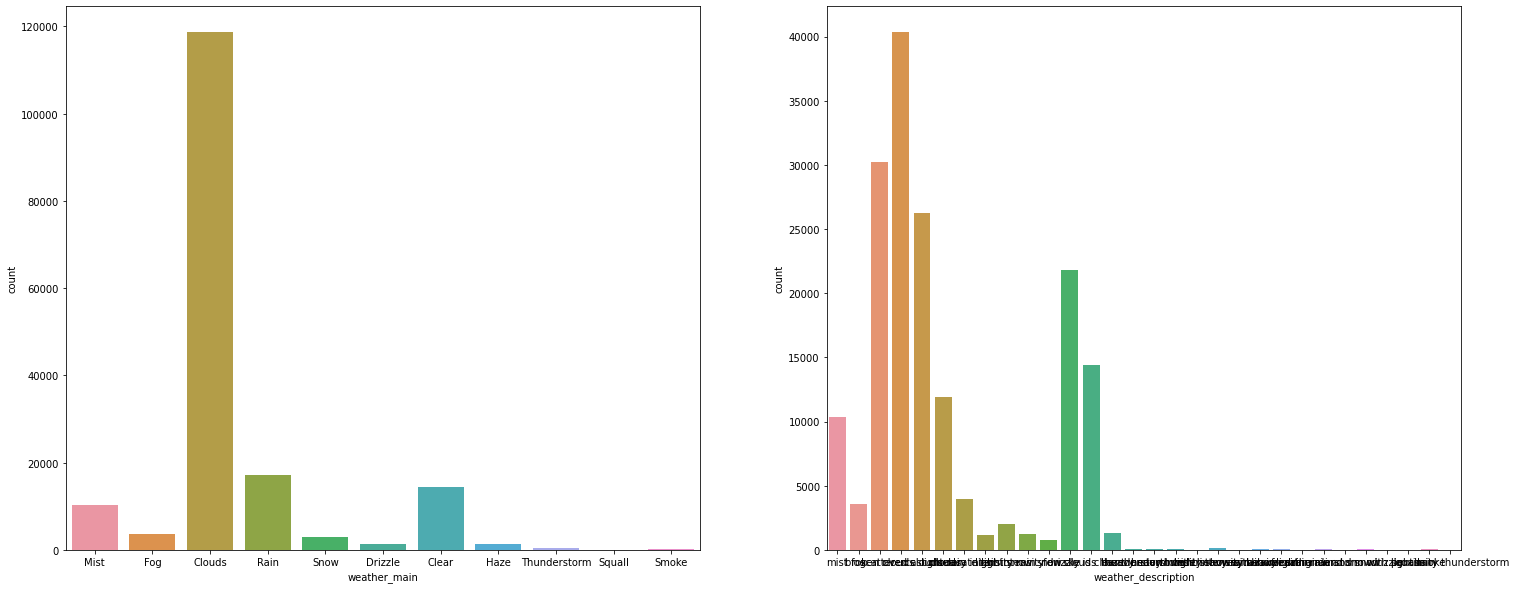

In [144]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(1, 2, figsize=(25, 10))
for variable, subplot in zip(cat_columns, ax.flatten()):
    sns.countplot(df_csv[variable], ax=subplot)

In [145]:
#check each categorical value
vals = df_csv[['weather_main', 'weather_description']]
for x in range(2):
    print(vals.columns[x] + ":")
    print(vals[vals.columns[x]].unique())
    print("")

weather_main:
['Mist' 'Fog' 'Clouds' 'Rain' 'Snow' 'Drizzle' 'Clear' 'Haze'
 'Thunderstorm' 'Squall' 'Smoke']

weather_description:
['mist' 'fog' 'broken clouds' 'scattered clouds' 'overcast clouds'
 'light rain' 'moderate rain' 'heavy intensity rain' 'light snow'
 'light intensity drizzle' 'snow' 'few clouds' 'sky is clear' 'haze'
 'heavy snow' 'thunderstorm' 'thunderstorm with heavy rain'
 'heavy intesity shower rain' 'thunderstorm with rain'
 'light intensity shower rain' 'very heavy rain' 'shower rain'
 'freezing rain' 'light rain and snow' 'rain and snow'
 'thunderstorm with light rain' 'drizzle' 'squalls' 'smoke'
 'proximity thunderstorm']



Below we look at a pivot table, curious if this will give us insight.

In [146]:
df_csv.pivot_table(['temp'],index=['weather_main'])

,temp
weather_main,
Clear,9.675238
Clouds,13.037746
Drizzle,10.180949
Fog,12.701807
Haze,21.785759
Mist,12.252922
Rain,12.685833
Smoke,17.092212
Snow,-1.213040


The above confirms for us the typical temperature average distribution we would expect for different weather patterns.  This helps us with the data integrity.

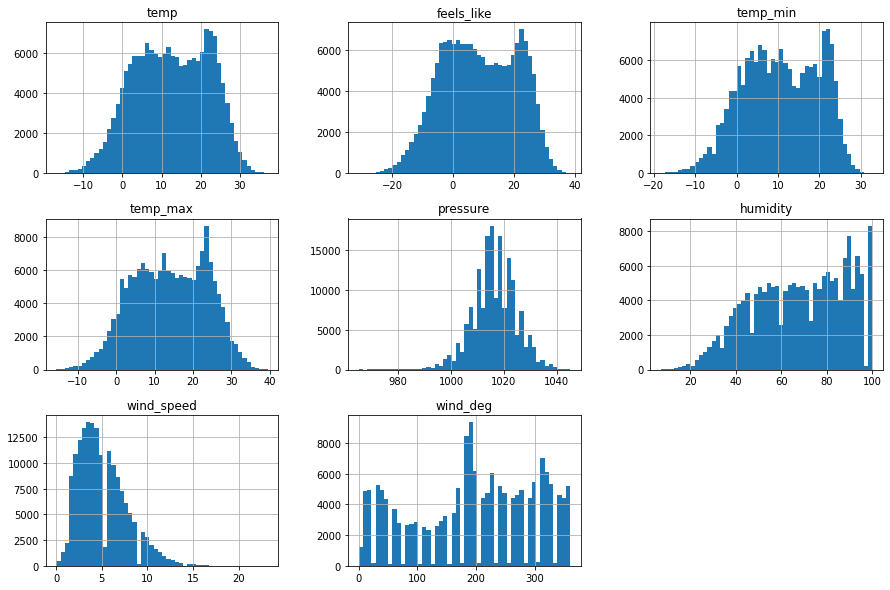

In [147]:
#histograms
df_csv.hist(bins=50, figsize=(15,10))
plt.show()

We see that humitidy, wind speed, and wind_deg stand out as not being normal.

Below we use one_hot encoding in order to do the tree regressor.

In [148]:
#we are going to do a tree regressor
#we need to convert the categorical data via get_dummies to do so
one_hot = pd.get_dummies(df_csv[['weather_main', 'weather_description']])

#drop weather_main and weather_description from df_csv
df_csv.drop(['weather_main', 'weather_description'],axis=1,inplace=True)

#put the two dataframes together
test = pd.concat([df_csv,one_hot],axis=1, join = "inner")

#show what we have
test.head()

,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,weather_description_broken clouds,weather_description_drizzle,weather_description_few clouds,weather_description_fog,weather_description_freezing rain,weather_description_haze,weather_description_heavy intensity rain,weather_description_heavy intesity shower rain,weather_description_heavy snow,weather_description_light intensity drizzle,weather_description_light intensity shower rain,weather_description_light rain,weather_description_light rain and snow,weather_description_light snow,weather_description_mist,weather_description_moderate rain,weather_description_overcast clouds,weather_description_proximity thunderstorm,weather_description_rain and snow,weather_description_scattered clouds,weather_description_shower rain,weather_description_sky is clear,weather_description_smoke,weather_description_snow,weather_description_squalls,weather_description_thunderstorm,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain
0,2003-01-01 00:00:00 +0000 UTC,6.62,3.34,3.9,10.6,1014,100,3.56,205,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2003-01-01 00:00:00 +0000 UTC,6.62,3.34,3.9,10.6,1014,100,3.56,205,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2003-01-01 01:00:00 +0000 UTC,6.53,4.26,4.0,9.4,1015,100,2.10,260,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2003-01-01 01:00:00 +0000 UTC,6.53,4.26,4.0,9.4,1015,100,2.10,260,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2003-01-01 02:00:00 +0000 UTC,6.33,2.74,2.0,9.4,1014,100,3.92,232,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [279]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#we drop anything that would be "too much" concurrent information when looking for "feels_like" or is irrelevant
test.drop(['dt_iso','temp','temp_min','temp_max'],axis=1,inplace=True)

#use randomforestregressor to see if our model is reasonable
df = test.copy()
X = df.drop(['feels_like'], axis = 1)
y = df_csv['feels_like']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

df_model1 = RandomForestRegressor().fit(X_train , y_train)
accuracies = cross_val_score(estimator = df_model1, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = df_model1.predict(X_test)
print('')
print('###### Random Forest ######')
print('Score : %.4f' % df_model1.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.0min finished



###### Random Forest ######
Score : 0.5163
[0.50741525 0.50224674 0.50580511 0.50475887 0.50570573]
MSE    : 71.47 
MAE    : 6.56 
RMSE   : 8.45 
R2     : 0.52 


# Conclusion

Our results speak for themselves:

```
###### Random Forest ######
Score : 0.5163
[0.50741525 0.50224674 0.50580511 0.50475887 0.50570573]
MSE    : 71.47 
MAE    : 6.56 
RMSE   : 8.45 
R2     : 0.52 
```
We attempted to predict what the temperature feels like using anything but the temperature, and it seems that it is no better than a random guess.  Factors such as pressure, humidity,	wind_speed,	wind_deg, and weather description do not seem to assist in predicting what the temperature will feel like.

Overall we have found an interesting phenomenon: twenty years of data, even using an incredible powerful ensemble model regressor, is not as easy to predict as a shorter timeframe (i.e. a month).